In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
# load the dataset
dataframe = read_csv('/content/drive/My Drive/GuwahatiCovidcsv.csv')
#




In [4]:
# Replaceing NaN values with 0
dataframe.fillna(0, inplace=True)

In [5]:
dataframe.head()

,From Date,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
0,18-02-2019 00:00,58.04,6.40,15.73,0.0,1.86,229.44,0.22,1002.19,0.00,20.87
1,18-02-2019 01:00,60.00,6.08,18.36,0.0,1.54,217.20,1.46,956.00,0.24,18.92
2,18-02-2019 02:00,55.50,6.71,34.54,0.0,0.66,197.21,0.00,1001.60,0.00,18.33
3,18-02-2019 03:00,66.56,7.00,31.85,0.0,0.61,206.44,0.00,1001.41,0.00,17.63
4,18-02-2019 04:00,67.08,9.45,24.07,0.0,0.54,230.53,0.00,980.67,0.00,16.61


In [6]:
#  dataset has columns for features and a target variable

feature_columns = [ 'NO2' , 	'Ozone'	 , 'RH' 	, 'WS' , 	'WD'	, 'SR'  , 	'BP'	, 'RF' , 	'AT']
target_column = 'PM2.5'

In [7]:
# Splitting the dataset into features and target variable
X = dataframe[feature_columns].values
y = dataframe[target_column].values

In [8]:
# Normalizing the feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# sliding window parameters
window_size = 15  # Number of past time steps considered
output_size =  30# Number of steps ahead used to predict pollutant concentration

In [10]:
# Create 3D dataset using sliding window technique
def create_dataset(X, y, window_size, output_size):
    X_windowed = []
    y_windowed = []
    for i in range(len(X) - window_size - output_size + 1):
        X_windowed.append(X[i:i+window_size])
        y_windowed.append(y[i+window_size:i+window_size+output_size])
    return np.array(X_windowed), np.array(y_windowed)

X_windowed, y_windowed = create_dataset(X_scaled, y, window_size, output_size)

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_windowed, y_windowed, test_size=0.2, random_state=42)

In [12]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(LSTM(units = units, return_sequences=True),
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

model_bilstm = create_bilstm(64)

def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 16, shuffle = False, callbacks = [early_stop])
    return history


history_bilstm = fit_model(model_bilstm)

Epoch 1/100
1321/1321 [==============================] - 46s 31ms/step - loss: 4382.1768 - val_loss: 4133.9668
Epoch 2/100
1321/1321 [==============================] - 38s 29ms/step - loss: 3498.9851 - val_loss: 3099.9451
Epoch 3/100
1321/1321 [==============================] - 36s 27ms/step - loss: 2968.6077 - val_loss: 2897.1606
Epoch 4/100
1321/1321 [==============================] - 39s 30ms/step - loss: 2827.4980 - val_loss: 2812.0076
Epoch 5/100
1321/1321 [==============================] - 35s 27ms/step - loss: 2730.6201 - val_loss: 2761.7869
Epoch 6/100
1321/1321 [==============================] - 37s 28ms/step - loss: 2677.3235 - val_loss: 2739.2100
Epoch 7/100
1321/1321 [==============================] - 35s 27ms/step - loss: 2628.1128 - val_loss: 2682.3750
Epoch 8/100
1321/1321 [==============================] - 38s 29ms/step - loss: 2594.4922 - val_loss: 2666.4458
Epoch 9/100
1321/1321 [==============================] - 36s 27ms/step - loss: 2570.8008 - val_loss: 2641.1182
E

In [13]:
# output_size = 10
# model = model_bilstm
# model = Sequential()
# model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Bidirectional(LSTM(units=50)))
# model.add(Dense(output_size))  # Output layer with 'output_size' neurons for multi-step ahead prediction
# model.compile(optimizer='adam', loss='mse')



# Define the optimized model
optimized_model = Sequential()
optimized_model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
optimized_model.add(Dropout(0.2))  # Add dropout to prevent overfitting
optimized_model.add(Bidirectional(LSTM(units=64)))
optimized_model.add(Dense(output_size))
optimized_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model = optimized_model

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
826/826 [==============================] - 38s 39ms/step - loss: 4750.1011 - val_loss: 4134.1704
Epoch 2/100
826/826 [==============================] - 29s 35ms/step - loss: 4166.0264 - val_loss: 4131.5732
Epoch 3/100
826/826 [==============================] - 28s 34ms/step - loss: 3779.7163 - val_loss: 3262.2051
Epoch 4/100
826/826 [==============================] - 28s 34ms/step - loss: 3129.7576 - val_loss: 2880.3596
Epoch 5/100
826/826 [==============================] - 29s 35ms/step - loss: 2887.3674 - val_loss: 2756.5276
Epoch 6/100
826/826 [==============================] - 29s 35ms/step - loss: 2767.5103 - val_loss: 2656.8958
Epoch 7/100
826/826 [==============================] - 29s 35ms/step - loss: 2656.6460 - val_loss: 2581.8828
Epoch 8/100
826/826 [==============================] - 30s 36ms/step - loss: 2542.9199 - val_loss: 2458.7507
Epoch 9/100
826/826 [==============================] - 29s 35ms/step - loss: 2419.8425 - val_loss: 2316.1560
Epoch 10/100
826/82

In [ ]:
https://github.com/ItSakSuruj/Bidirectional-LSTM/blob/main/Bidirectional-Guwahati.ipynb
https://github.com/bnsreenu/python_for_microscopists/blob/master/164a-Intro_to_time_series_Forecasting_using_feed_forward_NN.py

In [30]:

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

207/207 [==============================] - 2s 8ms/step


207/207 [==============================] - 3s 14ms/step


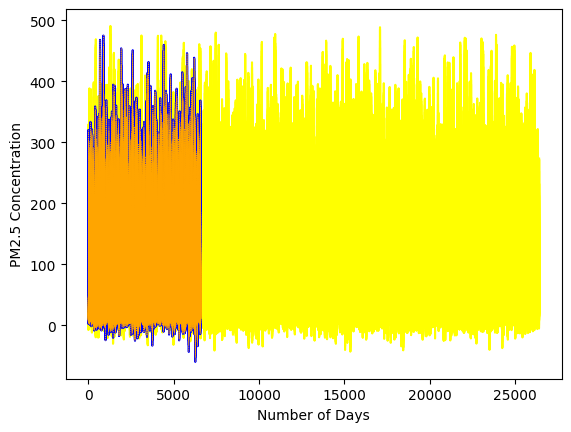

In [61]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Plot the training predictions
plt.plot(trainPredict, label='Train as Yellow' , color='yellow' ,)

# Plot the testing predictions
plt.plot(testPredict , label='Test as Blue' ,  color='blue')

# Plot the actual predictions (not the model itself)
plt.plot(model.predict(X_test), color='orange' , label='Predcition as Orange' ,linewidth=0.5 , linestyle='dotted')

# Add a legend with the specified colors
# Get the legend text objects
plt.ylabel("PM2.5 Concentration")
plt.xlabel("Number of Days")
# Show the plot
plt.show()

In [ ]:
# https://medium.com/@srmousavi25/how-to-fix-a-common-mistake-in-lstm-time-series-forecasting-4d4d51d9948f